In [2]:
library(dplyr)
library(ggplot2)
library(scales)
library(tidyverse)
library(tidyr)
library(reshape2)
library(cowplot)

In [3]:
snps_epi <- read.csv('../data/snps_epi_pairwise.csv')[,-1]
str(snps_epi)

'data.frame':	2094081 obs. of  17 variables:
 $ Sample.1            : chr  "N19-02156" "N19-02156" "N19-02158" "N19-02156" ...
 $ Sample.2            : chr  "N19-02158" "N19-02159" "N19-02159" "N19-02160" ...
 $ wg_snps             : int  18248 20383 17799 18976 7 18516 18243 18792 19806 20870 ...
 $ cs_snps             : int  16591 17835 16503 17066 10 17004 17027 17491 18250 18668 ...
 $ Date.of.Collection.x: chr  "2017-12-06" "2017-12-06" "2017-12-06" "2017-12-06" ...
 $ Source.x            : chr  "Environmental" "Environmental" "Environmental" "Environmental" ...
 $ Patient.x           : chr  "n/a" "n/a" "n/a" "n/a" ...
 $ SequenceType.x      : chr  "17" "17" "381" "17" ...
 $ HOSP.x              : chr  "M" "M" "M" "M" ...
 $ ROOM.x              : chr  "1809" "1809" "1814" "1809" ...
 $ Date.of.Collection.y: chr  "2017-12-06" "2017-12-06" "2017-12-06" "2017-12-06" ...
 $ Source.y            : chr  "Environmental" "Environmental" "Environmental" "Environmental" ...
 $ Patient.y     

In [6]:
xsnps_epi <- read.csv('../data/xsnps_epi_pairwise.csv')[,-1]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


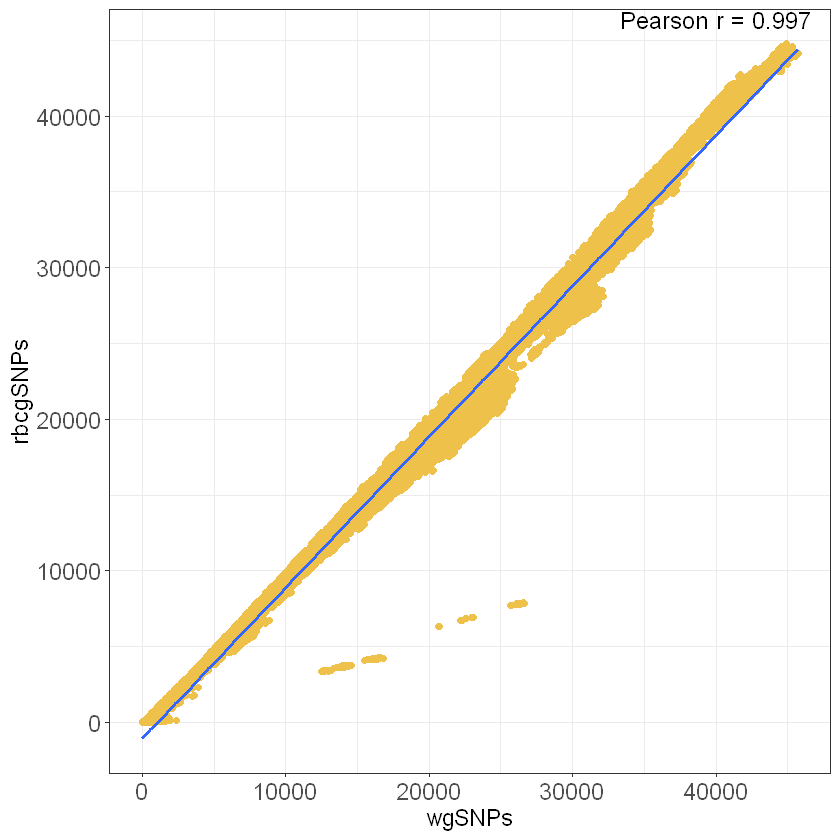

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


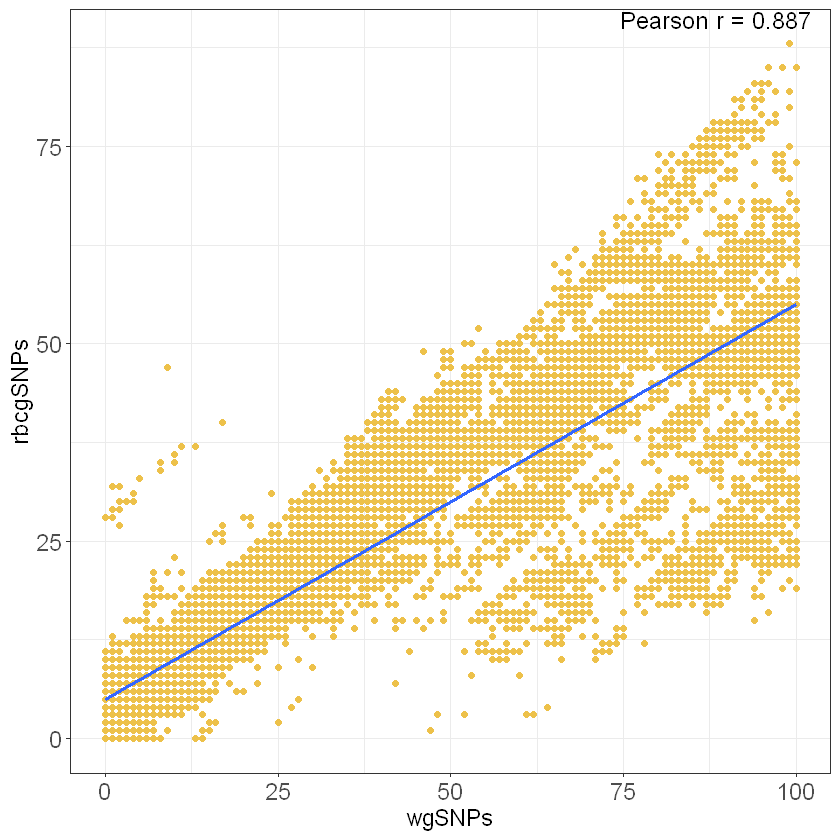

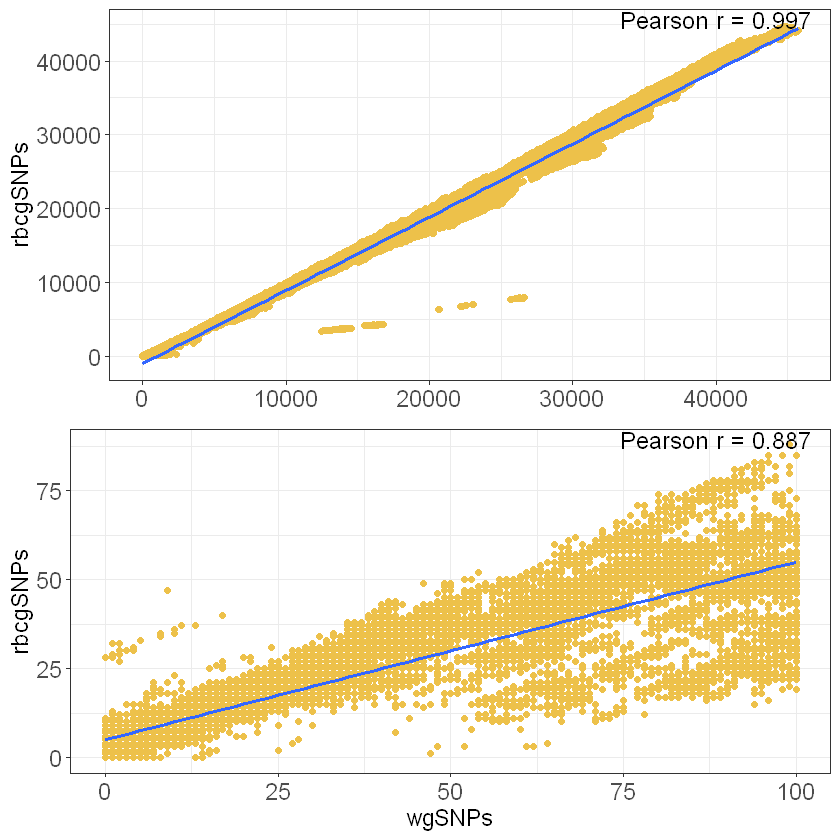

In [7]:
r1 <- round(cor(snps_epi$wg_snps, snps_epi$cs_snps),3)
c1 <- snps_epi %>%
ggplot()+
aes(x=wg_snps, y=cs_snps)+
geom_point(color='#EDC14A')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r1), 
           hjust = 1.1, vjust = 1.1, size = 5) 
c1



snps_epi100 <- snps_epi %>% filter(wg_snps <= 100) 
r2 <- round(cor(snps_epi100$wg_snps, snps_epi100$cs_snps),3)

c1_100 <- snps_epi %>% filter(wg_snps <= 100) %>%
ggplot()+
aes(x=wg_snps, y=cs_snps)+
geom_point(color='#EDC14A')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r2), 
           hjust = 1.1, vjust = 1.1, size = 5) 
c1_100

plot_grid(c1+theme(axis.title.x = element_blank()), c1_100, ncol=1)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


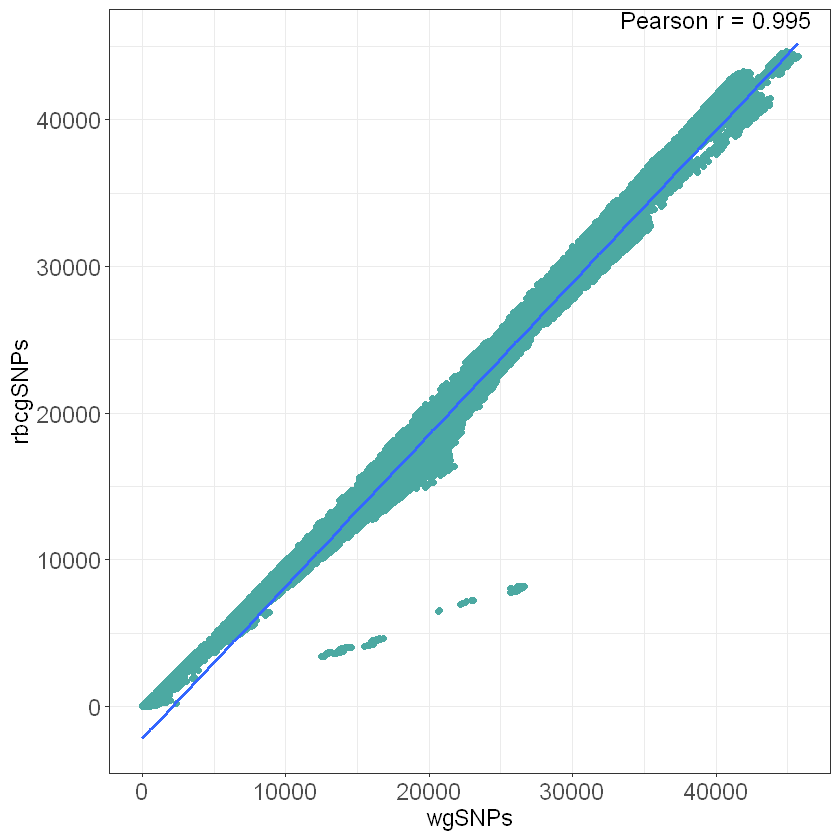

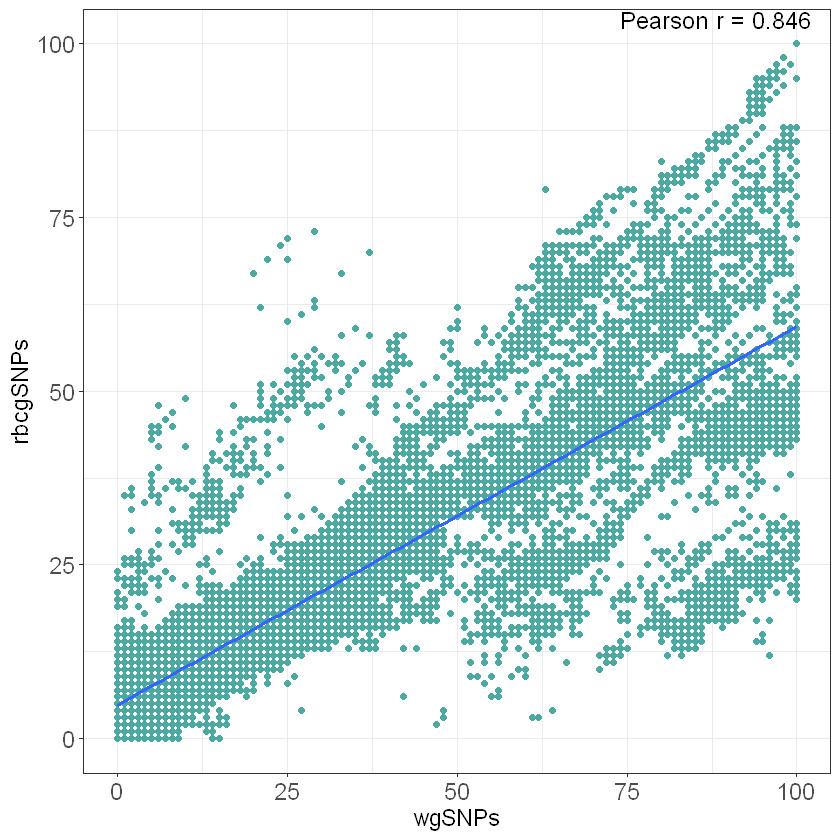

In [11]:
pa14 <- read.csv('../data/core_map_dist_pa14.tsv', sep = '\t', header = FALSE)
pa14 <- pa14 %>% unite(col = "pairs", V1, V2, sep = "_")
wg <- snps_epi %>% select(Sample.1, Sample.2, wg_snps) %>% unite(col = "pairs", Sample.1, Sample.2, sep = "_")
snps_pa14 <- merge(wg, pa14, by = 'pairs')

r3 <- round(cor(snps_pa14$wg_snps, snps_pa14$V3),3)
c2 <- snps_pa14 %>%
ggplot()+
aes(x=wg_snps, y=V3)+
geom_point(color='#4CA9A2')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r3), 
           hjust = 1.1, vjust = 1.1, size = 5) 




snps_pa14100 <- snps_pa14 %>% filter(wg_snps <= 100) 
r4 <- round(cor(snps_pa14100$wg_snps, snps_pa14100$V3),3)

c2_100 <- snps_pa14100 %>%
ggplot()+
aes(x=wg_snps, y=V3)+
geom_point(color='#4CA9A2')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r4), 
           hjust = 1.1, vjust = 1.1, size = 5) 


c2
c2_100

In [10]:
pa7 <- read.csv('../data/core_map_dist_pa7.tsv', sep = '\t', header = FALSE)
pa7 <- pa7 %>% unite(col = "pairs", V1, V2, sep = "_")
wg <- snps_epi %>% select(Sample.1, Sample.2, wg_snps) %>% unite(col = "pairs", Sample.1, Sample.2, sep = "_")
snps_pa7 <- merge(wg, pa7, by = 'pairs')


r5 <- round(cor(snps_pa7$wg_snps, snps_pa7$V3),3)
c3 <- snps_pa7 %>%
ggplot()+
aes(x=wg_snps, y=V3)+
geom_point(color='#7F389D')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r5), 
           hjust = 1.1, vjust = 1.1, size = 5) 



snps_pa7100 <- snps_pa7 %>% filter(wg_snps <= 100) 
r6 <- round(cor(snps_pa7100$wg_snps, snps_pa7100$V3),3)

c3_100 <- snps_pa7100 %>%
ggplot()+
aes(x=wg_snps, y=V3)+
geom_point(color='#7F389D')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r6), 
           hjust = 1.1, vjust = 1.1, size = 5) 



In [ ]:
c3
c3100


In [ ]:
pa01 <- xsnps_epi %>% filter(Group.x==Group.y) %>%
filter(Group.x =='pa01')


r1 <- round(cor(pa01$wg_snps, pa01$cg_snps),3)
c1 <- pa01 %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#EDC14A')+
geom_smooth(method = 'lm')+
ylab('rfcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r1), 
           hjust = 1.1, vjust = 1.1, size = 5) 
c1



pa01100 <- pa01 %>% filter(wg_snps <= 100) 
r2 <- round(cor(pa01100$wg_snps, pa01100$cg_snps),3)

c1_100 <- pa01100 %>% filter(wg_snps <= 100) %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#EDC14A')+
geom_smooth(method = 'lm')+
ylab('rfcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r2), 
           hjust = 1.1, vjust = 1.1, size = 5) 
c1_100



In [ ]:
pa14 <- xsnps_epi %>% filter(Group.x==Group.y) %>%
filter(Group.x =='pa14')

r3 <- round(cor(pa14$wg_snps, pa14$cg_snps),3)
c2 <- pa14 %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#4CA9A2')+
geom_smooth(method = 'lm')+
ylab('rfcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r3), 
           hjust = 1.1, vjust = 1.1, size = 5) 




pa14100 <- pa14 %>% filter(wg_snps <= 100) 
r4 <- round(cor(pa14100$wg_snps, pa14100$cg_snps),3)

c2_100 <- pa14100 %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#4CA9A2')+
geom_smooth(method = 'lm')+
ylab('rbcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r4), 
           hjust = 1.1, vjust = 1.1, size = 5) 


plot_grid(c2+theme(axis.title.x = element_blank()), c2_100, ncol=1, align = 'hv')

In [ ]:
pa7 <- xsnps_epi %>% filter(Group.x==Group.y) %>%
filter(Group.x =='pa7')

r5 <- round(cor(pa7$wg_snps, pa7$cg_snps),3)
c3 <- pa7 %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#7F389D')+
geom_smooth(method = 'lm')+
ylab('rfcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r5), 
           hjust = 1.1, vjust = 1.1, size = 5) 



pa7100 <- pa7 %>% filter(wg_snps <= 100) 
r6 <- round(cor(pa7100$wg_snps, pa7100$cg_snps),3)

c3_100 <- pa7100 %>%
ggplot()+
aes(x=wg_snps, y=cg_snps)+
geom_point(color='#7F389D')+
geom_smooth(method = 'lm')+
ylab('rfcgSNPs')+xlab('wgSNPs')+
theme_bw()+
theme(axis.title.x = element_text(size=14),
      axis.text.x =element_text(size=14),
     axis.title.y = element_text(size=14),
      axis.text.y = element_text(size=14))+
  annotate("text", x = Inf, y = Inf, label = paste("Pearson r =", r6), 
           hjust = 1.1, vjust = 1.1, size = 5) 

